# Projet Python : SkillCraft1_Dataset

* BATMANABANE Natacha DIA1
* BERLIOZ Nicolas DIA1
* BONHOMME Lana DIA1

StarCraft est un jeu vidéo.

## Problématique:  Comment déterminer la league d'un joueur à partir de ses statistiques?

#### IMPORTER LES LIBRAIRIES

In [ ]:
# essential libraries
import json
import random
import math
# storing and analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#modelisation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#mod 2
import statsmodels.formula.api as smf

#time
from datetime import datetime
from datetime import timezone



#### IMPORTER LE DATASET

In [ ]:
SkillCraft = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv", sep=',') 
SkillCraft.head(2)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208


Le dataset sur SkillCraft a bien ses noms de colonnes. Si elle ne les a pas. Vous pouvez faire comme ci-dessous pour récupérer.

In [ ]:
!pip install selenium
!pip install selenium==4.2.0 --force-reinstall
!pip install lxml
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.0 MB/s 
     |████████████████████████████████| 384 kB 60.6 MB/s 
     |████████████████████████████████| 140 kB 59.3 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 983 kB 5.2 MB/s 
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#selenium 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re 
import requests

def get_tags(full_path) :
    tmp = driver.find_element(By.XPATH, full_path)
    res = driver.execute_script("return arguments[0].innerHTML;",tmp)
    return BeautifulSoup(res, 'html.parser')
    

driver = webdriver.Chrome()
driver.get("http://archive.ics.uci.edu/ml/datasets/skillcraft1+master+table+dataset")
soup = BeautifulSoup(driver.page_source, "html.parser")

description_path = "/html/body/table[2]/tbody/tr/td/p[6]"
description =  get_tags(description_path)


######################fermer le navigateur
driver.quit()

des = str(description).split()

nom_col = [des[1][0:-1]]
for i in range(0,len(des)):
    if(des[i][0:5]=='<br/>'):
        nom_col.append(des[i+2][0:-1])

######################SkillCraft.set_axis(nom_col, axis=1, inplace=False)        
nom_col

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


WebDriverException: ignored

Description du dataset

In [ ]:
print(description)

NameError: ignored

# I. Nettoyage des données

In [ ]:
def Nettoyer_dataframe(df): 
    print("Taille des données du dataframe à l'initial: ")
    print(df.shape)
    
    #colonnes vides
    cols_vides = [col for col in df.columns if df[col].isnull().all()]
    df.drop(cols_vides, axis=1, inplace=True) #supprimer les colonnes vides
    
    #Enlever les lignes vides Nan
    df.dropna(axis =0, how='all', inplace=True)
    
    #Enlever les doublons
    df.drop_duplicates(keep="first", inplace = True)
    
    print("Taille des données du dataframe à la fin: ")
    print(df.shape)
    
    print("\nQuelques lignes du dataframe:")
    print(df.head(2))
    

In [ ]:
Nettoyer_dataframe(SkillCraft)

Taille des données du dataframe à l'initial: 
(3395, 20)
Taille des données du dataframe à la fin: 
(3395, 20)

Quelques lignes du dataframe:
   GameID  LeagueIndex Age HoursPerWeek TotalHours       APM  SelectByHotkeys  \
0      52            5  27           10       3000  143.7180         0.003515   
1      55            5  23           10       5000  129.2322         0.003304   

   AssignToHotkeys  UniqueHotkeys  MinimapAttacks  MinimapRightClicks  \
0         0.000220              7        0.000110            0.000392   
1         0.000259              4        0.000294            0.000432   

   NumberOfPACs  GapBetweenPACs  ActionLatency  ActionsInPAC  \
0      0.004849         32.6677        40.8673        4.7508   
1      0.004307         32.9194        42.3454        4.8434   

   TotalMapExplored  WorkersMade  UniqueUnitsMade  ComplexUnitsMade  \
0                28     0.001397                6               0.0   
1                22     0.001193                5          

On remarque que le dataset a supprimé aucune ligne et colonne.
Nous remarquons qu'il y a des valeurs nulles représentées par un "?"
On remarque qu'il y a des "?" dans les colonnes **Age - HoursPerWeek - TotalHours**

In [ ]:
def replace_question_mark(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x : np.NaN if(x == '?') else x)

replace_question_mark(SkillCraft)
SkillCraft

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [ ]:
SkillCraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3340 non-null   object 
 3   HoursPerWeek          3339 non-null   object 
 4   TotalHours            3338 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

Nous observons qu'il n'y a pas énormément de valeurs nulles donc nous allons supprimer les lignes concernées dans une copie du dataframe.

In [ ]:
SkillCraft.isnull().sum()


GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

Pour que la colonne LeagueIndexsoit plus claire, on va créer une colonne LeagueIndex et les remplacer par Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)

In [ ]:
dict_league = {1: "Bronze", 2:"Silver", 3:"Gold", 4:"Platinum", 5:"Diamond", 6:"Master", 7:"GrandMaster", 8:"Professional"}
SkillCraft['Leagues'] = SkillCraft['LeagueIndex'].astype(str)
for i in range(1,9):
    SkillCraft['Leagues'] = SkillCraft['Leagues'].replace(to_replace=str(i),value=dict_league[i])

In [ ]:
SkillCraft.head(20)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Leagues
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,...,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000,Diamond
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,...,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208,Diamond
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,...,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189,Platinum
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,...,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384,Gold
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,...,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019,Gold
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,...,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000,Silver
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,...,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000,Bronze
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,...,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249,GrandMaster
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,...,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470,Platinum
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,...,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000,Platinum


# II. Analyses du dataset

# 1.**Leagues**
Nous utiliserons ici le dataframe Skillcraft parce qu'on se concentre plus sur ce qu'on a avant la suppression des lignes. Si on enlève les lignes où il y a du vide, on n' a plus d'informations sur la league8. Mais on ne prendra pas en compte les valeurs nulles dans notre modèle.

GameID est une clé primaire dans ce dataset. 3395 id différents comme le nombre de lignes du dataset. 

In [ ]:
SkillCraft['GameID'].nunique()

3395


#### 1. Nb de joueurs par LeagueIndex

In [ ]:
LeagueInd = SkillCraft.groupby('Leagues').count()
LeagueInd 



,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
Leagues,,,,,,,,,,,,,,,,,,,,
Bronze,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167,167
Diamond,806,806,806,805,804,806,806,806,806,806,806,806,806,806,806,806,806,806,806,806
Gold,553,553,553,553,553,553,553,553,553,553,553,553,553,553,553,553,553,553,553,553
GrandMaster,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Master,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621,621
Platinum,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811,811
Professional,55,55,0,0,0,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
Silver,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347


In [ ]:
fig = px.histogram(LeagueInd, x=LeagueInd.index, y= "GameID" , category_orders= dict(Leagues = list(dict_league.values())) , title="Nombre de joueurs par Leagues")
fig.update_layout(xaxis_title="Leagues" , yaxis_title="Nombre de joueurs")
fig.show()

Il y a plus de joueurs dans la leaguePlatinum et Diamond.

Nous remarquons que la plupart des joueurs se situent dans les ligues "moyennes".
Il semble qu'il soit facile de progresser vers la leaguePlatinum/Diamond, mais pour atteindre la leagueMaster ou GrandMaster, de sérieuses compétences sont nécessaires.

#### 2. Age des joueurs par Leagues


In [ ]:
LeagueAge = SkillCraft.groupby(['Leagues', 'Age'],as_index=False).count()
LeagueAge.style.hide_index()
fig = px.line(LeagueAge ,  x='Age', y= "GameID", color='Leagues' ,category_orders= dict(Leagues = list(dict_league.values())),  title="Age des joueurs par League")
fig.show()

Les ages des joueurs sont à un peu près pareil pour toutes les leagues.Comparé à GrandMaster, nous semblions avoir une population légèrement plus jeune dans les autres leagues. 



#### 3. Actions par minute par league

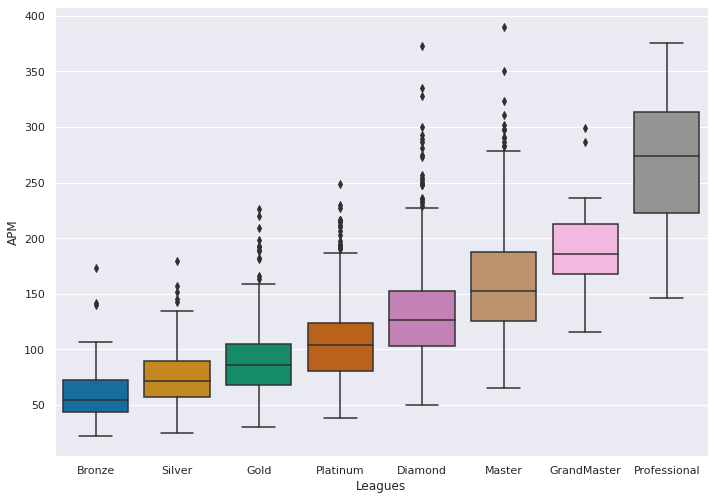

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y='APM', x='Leagues', data=SkillCraft, order= list(dict_league.values()), palette="colorblind")

Le nombre d'actions par minute reste élevé dans la leagueGrandMaster que dans les autres.

#### 4. ActionLatency par league
ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)

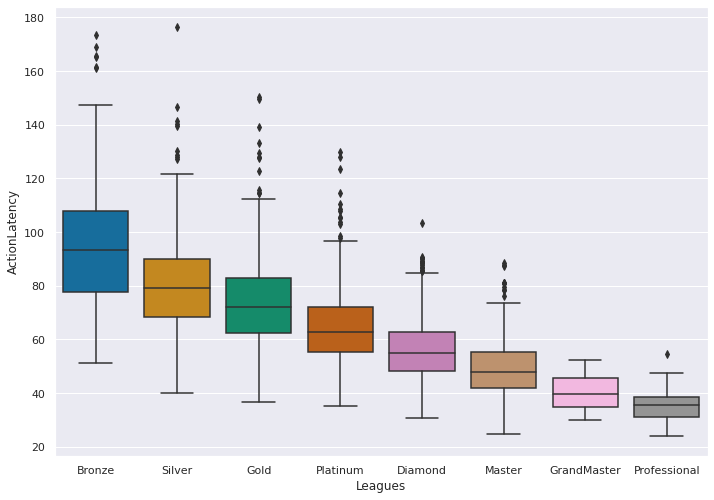

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y='ActionLatency', x='Leagues', data=SkillCraft, order= list(dict_league.values()), palette="colorblind")

#### 5. SelectByHotkeys par leagues
SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)

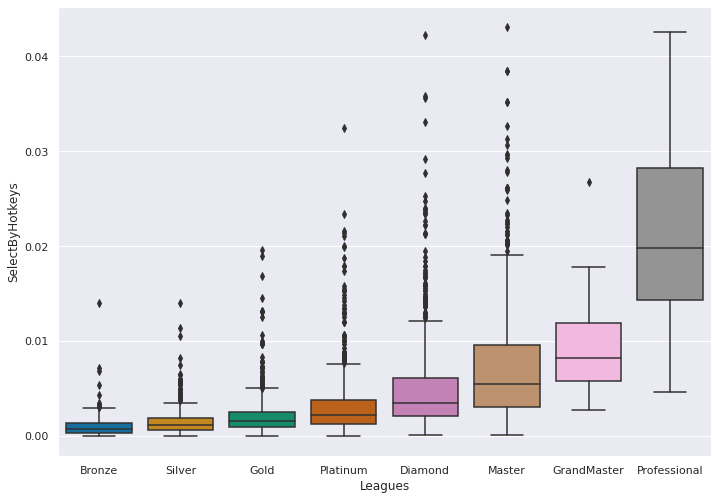

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y='SelectByHotkeys', x='Leagues', data=SkillCraft, order= list(dict_league.values()), palette="colorblind")

Les colonnes ActionLatency et SelectByHotkeys semblent un peu plus intéressants. 
Apparemment, la plupart des joueurs de la leagueGrandMaster ont une faible latence et réagissent donc rapidement aux événements (ce qui serait logique). De même, les joueurs des ligues Master et GrandMaster semblent sélectionner leurs unités à l'aide de touches de raccourci plus souvent que les joueurs des autres ligues. Dans l'ensemble, la moyenne des distributions semble varier d'environ 100 à environ 30-40 lorsque l'on passe de Bronze à GrandMaster (ActionLatency) et de même pour la variable SelectByHotkeys.

#### 6. Corrélations entre les variables du dataset

Text(0.5, 1.0, 'Corrélation entre les variables du SkillCraft1')

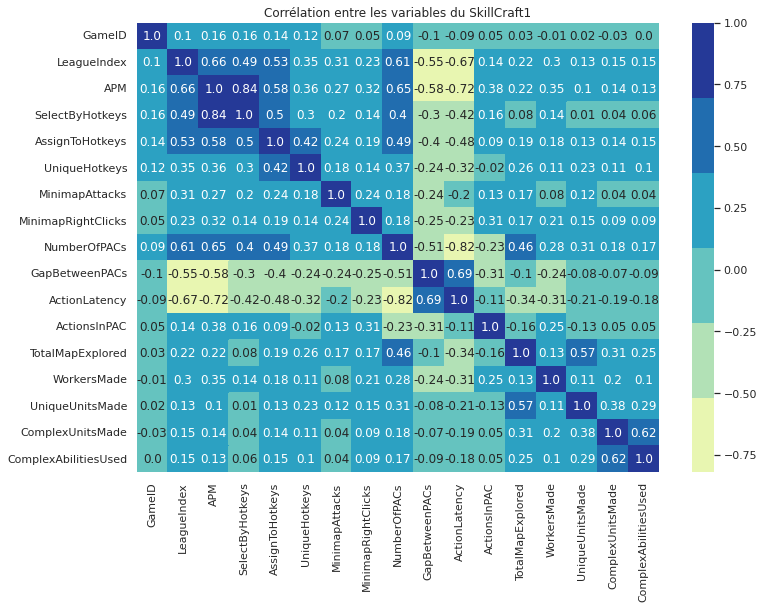

In [ ]:
colormap = sns.color_palette("YlGnBu")
df = round(SkillCraft.corr(),2)
ax = plt.axes()
sns.heatmap(df, annot=True, cmap=colormap, fmt="")
ax.set_title("Corrélation entre les variables du SkillCraft1")

Les couleurs sont bien choisies du plus foncé pour une forte corrélation au plus clair pour une faible corrélation. SelectByHotkeys et APM sont corrélés à 81%. Les meilleurs prédicteurs sont APM, NumberofPACs et AssigntoHotkeys.


On pourrait s'attendre à ce que l'âge et la Ligue soient corrélés mais, ce n'est pas le cas et il semble avoir de bons joueurs parmi les jeunes et les moins jeunes !
On voit que ce sont les fonctionnalités les plus techniques qui sont les plus prédictives du niveau du joueur, comme ActionLatency (- 0,67), APM (0,66), NumberOfPACs (0,61), GapBetweenPACs (-0,55) ou AssignToHotKeys (0,53).
Du coup,  le profil type d'un bon joueur : 

*   faible latence
*   réaction rapide
*   utilisation des raccourcis clavier

###### Scatter Matrix

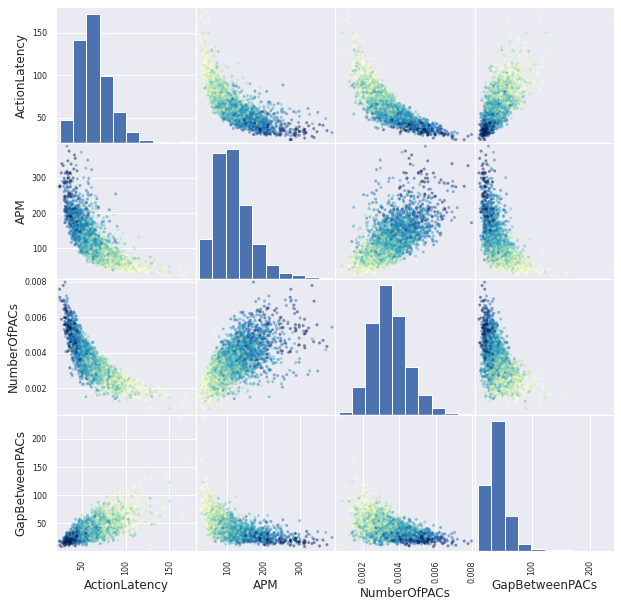

In [ ]:
interesting_features = ['ActionLatency', 'APM', 'NumberOfPACs', 'GapBetweenPACs']

pd.plotting.scatter_matrix(SkillCraft[interesting_features], 
                           c=SkillCraft['LeagueIndex'],
                           cmap='YlGnBu',
                           figsize=(10, 10),
                           label=SkillCraft['LeagueIndex']);


Nous pouvons voir avec ces graphiques que Action Latency semble être un bon classificateur avec les 3 autres fonctionnalités qui sont également bien corrélées avec League Index. En effet, plus le niveau des ligues augutement, plus il la latence d'action est grande.

# III.**Modélisations**

Nous devons supprimer les ligues de la league8  car nous avons aucune information sur l'age hoursweek et total hours

In [ ]:
SC_sansNull = SkillCraft
SC_sansNull.dropna(inplace = True)
SC_sansNull.shape

(3338, 21)

Convertir les colonnes

In [ ]:
from collections import defaultdict
col = ['Age','HoursPerWeek','TotalHours' ]
for i in range(len(col)):
  SC_sansNull[col[i]] = SC_sansNull[col[i]].astype(int)

##Modèles de Regression

In [ ]:
#Fonction de selection automatique du modele
def backward_selected(data, response):
        remaining = set(data._get_numeric_data().columns)
        if response in remaining:
            remaining.remove(response)
        cond = True
        while remaining and cond:
            formula = "{} ~ {} + 1".format(response,' + '.join(remaining))
            print('_______________________________')
            print(formula)
            model = smf.ols(formula, data).fit()
            score = model.pvalues[1:]
            toRemove = score[score == score.max()]
            if toRemove.values > 0.05:
                print('remove', toRemove.index[0], '(p-value :', round(toRemove.values[0],3), ')')
                remaining.remove(toRemove.index[0])
            else:
                cond = False
                print('is the final model !')
            print('')
        print(model.summary())
        return model

columns =['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed', 'Leagues']


###League Index

In [ ]:
reg_backward = backward_selected(SkillCraft[columns], 'LeagueIndex')

_______________________________
LeagueIndex ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + NumberOfPACs + TotalMapExplored + TotalHours + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + GapBetweenPACs + GameID + UniqueHotkeys + APM + ComplexUnitsMade + 1
remove MinimapRightClicks (p-value : 0.577 )

_______________________________
LeagueIndex ~ SelectByHotkeys + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + NumberOfPACs + TotalMapExplored + TotalHours + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + GapBetweenPACs + GameID + UniqueHotkeys + APM + ComplexUnitsMade + 1
remove ComplexAbilitiesUsed (p-value : 0.563 )

_______________________________
LeagueIndex ~ SelectByHotkeys + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + NumberOfPACs + TotalMapExplored + TotalHours + WorkersMade + Age + MinimapAttacks + GapBetweenP

###APM

In [ ]:
reg_backward = backward_selected(SkillCraft[columns], 'APM')

_______________________________
APM ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + NumberOfPACs + TotalMapExplored + TotalHours + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + LeagueIndex + GapBetweenPACs + GameID + UniqueHotkeys + ComplexUnitsMade + 1
remove HoursPerWeek (p-value : 0.559 )

_______________________________
APM ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + ActionsInPAC + NumberOfPACs + TotalMapExplored + TotalHours + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + LeagueIndex + GapBetweenPACs + GameID + UniqueHotkeys + ComplexUnitsMade + 1
remove TotalHours (p-value : 0.442 )

_______________________________
APM ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + ActionsInPAC + NumberOfPACs + TotalMapExplored + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + LeagueIndex +

###NumberOfPACs

In [ ]:
reg_backward = backward_selected(SkillCraft[columns], 'NumberOfPACs')

_______________________________
NumberOfPACs ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + TotalMapExplored + TotalHours + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + LeagueIndex + GapBetweenPACs + GameID + UniqueHotkeys + APM + ComplexUnitsMade + 1
remove TotalHours (p-value : 0.912 )

_______________________________
NumberOfPACs ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + TotalMapExplored + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + LeagueIndex + GapBetweenPACs + GameID + UniqueHotkeys + APM + ComplexUnitsMade + 1
remove GameID (p-value : 0.84 )

_______________________________
NumberOfPACs ~ SelectByHotkeys + MinimapRightClicks + UniqueUnitsMade + ActionLatency + AssignToHotkeys + HoursPerWeek + ActionsInPAC + TotalMapExplored + ComplexAbilitiesUsed + WorkersMade + Age + MinimapAttacks + LeagueInd

## **Regression Linéaire multiple**
https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-matriser-la-rgression-linaire-avec-scikit-learn#_Toc56803773 

Pour faire la régresssion linéaire multiple, j'enlève les colonnes qui ne m'intéressent pas.

In [ ]:
removed_cols = ['GameID','Leagues','TotalHours','MinimapRightClicks','UniqueUnitsMade',
                   'ComplexUnitsMade','ComplexAbilitiesUsed','MinimapAttacks','TotalMapExplored', 'NumberOfPACs', 'LeagueIndex']

X = SC_sansNull.drop(removed_cols, axis=1)
Y= SC_sansNull['LeagueIndex']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2670, 10)
(668, 10)
(2670,)
(668,)


Création du modèle

In [ ]:
#instancier modèle
model_linRegMul = LinearRegression()
#entrainement du modèle
model_linRegMul.fit(X_train, Y_train)
#précision du modèle
precision = model_linRegMul.score(X_test, Y_test)
print(precision)

0.5214314681673766


In [ ]:
model_linRegMul

LinearRegression()

In [ ]:
#prédiction
prediction = np.round(model_linRegMul.predict(X_test))
print(prediction)

[5. 4. 5. 1. 6. 4. 4. 5. 3. 3. 3. 4. 5. 4. 3. 6. 5. 4. 5. 3. 5. 5. 3. 3.
 4. 6. 3. 4. 5. 5. 5. 4. 3. 2. 3. 4. 5. 4. 5. 4. 5. 3. 4. 3. 3. 5. 4. 4.
 4. 2. 4. 5. 4. 5. 4. 3. 4. 4. 5. 5. 3. 4. 3. 5. 3. 5. 4. 6. 5. 3. 3. 3.
 3. 2. 4. 4. 5. 5. 3. 4. 5. 4. 4. 5. 4. 5. 5. 5. 5. 5. 3. 4. 4. 5. 3. 4.
 3. 5. 5. 5. 2. 2. 5. 3. 4. 3. 6. 5. 6. 6. 5. 4. 4. 4. 4. 5. 4. 4. 4. 4.
 4. 5. 4. 4. 5. 3. 5. 3. 4. 4. 1. 4. 6. 3. 6. 5. 5. 5. 3. 4. 4. 4. 4. 5.
 4. 4. 4. 3. 6. 6. 3. 4. 3. 2. 4. 4. 5. 4. 4. 3. 5. 4. 2. 3. 5. 3. 4. 4.
 3. 4. 5. 5. 2. 5. 3. 5. 5. 3. 4. 6. 5. 6. 4. 5. 5. 5. 5. 5. 4. 5. 4. 4.
 4. 5. 4. 4. 4. 5. 6. 5. 3. 4. 3. 3. 3. 4. 5. 3. 5. 4. 3. 4. 4. 4. 4. 4.
 4. 7. 5. 5. 5. 3. 5. 5. 4. 5. 4. 4. 4. 5. 4. 3. 2. 5. 5. 4. 3. 6. 4. 5.
 3. 2. 6. 5. 4. 6. 6. 5. 6. 3. 3. 5. 4. 6. 4. 2. 3. 4. 5. 2. 5. 4. 4. 4.
 4. 4. 5. 3. 4. 4. 4. 3. 6. 3. 4. 4. 4. 5. 4. 4. 4. 4. 2. 4. 6. 4. 3. 4.
 3. 4. 5. 4. 4. 3. 5. 3. 6. 4. 3. 4. 5. 4. 6. 4. 6. 5. 4. 5. 3. 3. 4. 3.
 5. 4. 4. 5. 5. 4. 4. 5. 5. 3. 5. 5. 5. 3. 4. 4. 6.

In [ ]:
model_linRegMul.intercept_

4.65498504833126

Les coeff du modèle

In [ ]:
model_linRegMul.coef_

array([ 1.39571203e-02,  9.47756709e-03,  5.33589816e-03,  3.99161603e+00,
        9.45440906e+02,  3.14822993e-02, -1.00785713e-02, -2.59817962e-02,
       -4.52314616e-02,  2.17278813e+02])

In [ ]:
print("Accuracy = ", accuracy_score(Y_test, prediction))
print("Confusion matrix = \n", confusion_matrix(Y_test, prediction))

Accuracy =  0.4041916167664671
Confusion matrix = 
 [[  2  10  17   3   0   0   0]
 [  1   8  36  23   1   0   0]
 [  0   6  50  42   6   1   0]
 [  0   4  36 105  37   2   0]
 [  0   1   7  56  73  12   0]
 [  0   0   0  21  70  29   2]
 [  0   0   0   0   1   3   3]]


## MLeast Squares Linear Regression


In [ ]:
#d
removed_cols = ['GameID','LeagueIndex','TotalHours','MinimapRightClicks','UniqueUnitsMade',
                   'ComplexUnitsMade','ComplexAbilitiesUsed', 'SelectByHotkeys','MinimapAttacks', 'ActionLatency','TotalMapExplored', 'NumberOfPACs', 'ActionLatency', 'Leagues']

X = SC_sansNull.drop(removed_cols, axis=1)
Y= SC_sansNull['LeagueIndex']

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2670, 8)
(668, 8)
(2670,)
(668,)


In [ ]:
X_train

,Age,HoursPerWeek,APM,AssignToHotkeys,UniqueHotkeys,GapBetweenPACs,ActionsInPAC,WorkersMade
3101,20,8,81.2796,0.000499,6,32.0161,3.7691,0.000521
2213,27,6,60.8982,0.000410,6,51.5168,2.9331,0.000599
778,16,20,124.6896,0.000615,5,20.4384,5.8259,0.000780
1526,29,6,68.2098,0.000144,5,53.0638,4.3386,0.000776
1781,21,2,67.8018,0.000138,5,50.8639,4.0941,0.000691
...,...,...,...,...,...,...,...,...
297,25,28,132.0822,0.000681,6,31.0236,11.7266,0.003198
2189,26,24,73.1130,0.000177,5,25.1139,4.9182,0.000725
532,16,20,187.2972,0.000265,2,25.7834,7.6005,0.002847
2053,18,12,183.1272,0.000991,6,34.9845,5.1266,0.001720


Obtain Model Coefficients

In [ ]:
from sklearn import linear_model
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train,Y_train) 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [ ]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [ 4.16334066e-03  9.07997865e-03  1.17977115e-02  9.85563728e+02
  3.88332663e-02 -2.08021192e-02 -1.29227748e-01  2.54954604e+02]
intercept=  3.278480226890526


In [ ]:
SC_sansNull.head(5)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,Leagues
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,...,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000,Diamond
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,...,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208,Diamond
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,...,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189,Platinum
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,...,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384,Gold
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,...,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019,Gold


In [ ]:
prediction = np.round(model_ols.predict(X_test))
predictedLeague = pd.DataFrame(prediction, columns=['Predicted League']) # Create new dataframe of column'Predicted Price'
actualLeague = pd.DataFrame(Y_test, columns=['LeagueIndex'])
actualLeague = actualLeague.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualLeague,predictedLeague],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,658,659,660,661,662,663,664,665,666,667
LeagueIndex,5.0,3.0,6.0,5.0,5.0,6.0,4.0,4.0,3.0,5.0,...,5.0,6.0,3.0,4.0,4.0,4.0,6.0,7.0,4.0,5.0
Predicted League,5.0,3.0,5.0,4.0,6.0,6.0,4.0,3.0,3.0,5.0,...,5.0,6.0,4.0,5.0,4.0,4.0,6.0,6.0,3.0,5.0


In [ ]:
print("Accuracy = ", accuracy_score(Y_test, prediction))
print("Confusion matrix = \n", confusion_matrix(Y_test, prediction))

Accuracy =  0.38323353293413176
Confusion matrix = 
 [[ 4 10 21  2  1  0  0  0]
 [ 0  7 46 20  0  0  0  0]
 [ 0  5 52 45  7  0  0  0]
 [ 0  2 36 87 31  4  0  0]
 [ 0  0  9 58 70 11  4  0]
 [ 0  0  0 29 57 32  5  1]
 [ 0  0  0  0  1  7  4  0]
 [ 0  0  0  0  0  0  0  0]]


In [ ]:
SC_sansNull.loc[1282]

GameID                      3735
LeagueIndex                    5
Age                           16
HoursPerWeek                  56
TotalHours                   500
APM                     163.9902
SelectByHotkeys         0.000521
AssignToHotkeys         0.000052
UniqueHotkeys                  1
MinimapAttacks          0.000156
MinimapRightClicks      0.001173
NumberOfPACs            0.002241
GapBetweenPACs           16.3294
ActionLatency            55.4884
ActionsInPAC             13.3953
TotalMapExplored              12
WorkersMade              0.00073
UniqueUnitsMade                5
ComplexUnitsMade             0.0
ComplexAbilitiesUsed         0.0
Leagues                  Diamond
Name: 1282, dtype: object

In [ ]:
param2 = np.array(X.loc[1282])
league = np.round(model_ols.predict([param2]))
print('Aves ces paramètres, tu es dans la ligue:', league[0])

Aves ces paramètres, tu es dans la ligue: 4.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Prediction Graph

Text(0.5, 1.0, 'League From Dataset Vs League Predicted BY_train Model')

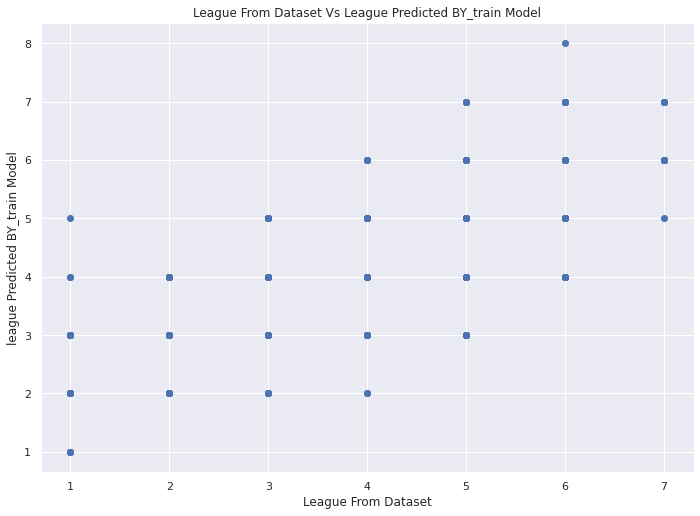

In [ ]:
plt.scatter(Y_test, np.round(model_ols.predict(X_test)))
plt.xlabel('League From Dataset')
plt.ylabel('league Predicted BY_train Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("League From Dataset Vs League Predicted BY_train Model")

L'accuracy du modèle s'avère être 0,37.

Cela signifie que  37%  des leagues qui sont bien préditent en fonction de l'Age,	HoursPerWeek,	APM	,AssignToHotkeys,	UniqueHotkeys,	GapBetweenPACs,	ActionsInPAC et WorkersMade.

## statsmodels

In [ ]:
import statsmodels.api as sm
model_sm = sm.OLS(Y_train, X_train).fit()
model_sm.params

Age                   0.064805
HoursPerWeek          0.014708
APM                   0.015367
AssignToHotkeys    1217.256477
UniqueHotkeys         0.062758
GapBetweenPACs       -0.005093
ActionsInPAC         -0.032421
WorkersMade         346.226937
dtype: float64

In [ ]:
league = np.round(model_sm.predict([param2]))
print('Aves ces paramètres, tu es dans la ligue:', league[0])

Aves ces paramètres, tu es dans la ligue: 4.0


In [ ]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            LeagueIndex   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              4991.
Date:                Tue, 06 Dec 2022   Prob (F-statistic):                        0.00
Time:                        18:54:05   Log-Likelihood:                         -4023.9
No. Observations:                2670   AIC:                                      8064.
Df Residuals:                    2662   BIC:                                      8111.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0648      0.004     16.311      0.000       0.057       0.073
HoursPerWeek        0.0147      0.002      7.974      0.000       0.011       0.018
APM                 0.0154      0.001     23.220      0.000       0.014       0.017
AssignToHotkeys  1217.2565    124.044      9.813      0.000     974.025    1460.488
UniqueHotkeys       0.0628      0.010      6.174      0.000       0.043       0.083
GapBetweenPACs     -0.0051      0.001     -4.050      0.000      -0.008      -0.003
ActionsInPAC       -0.0324      0.015     -2.178      0.029      -0.062      -0.003
WorkersMade       346.2269     43.854      7.895      0.000     260.235     432.219
==============================================================================
Omnibus:                       19.855   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.738
Skew:                          -0.171   Prob(JB):                     8.53e-05
Kurtosis:                       2.774   Cond. No.                     7.68e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelisation en modifiant les variables explicatives

In [ ]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Text(0.5, 1.0, 'Corrélation entre les variables du SkillCraft1')

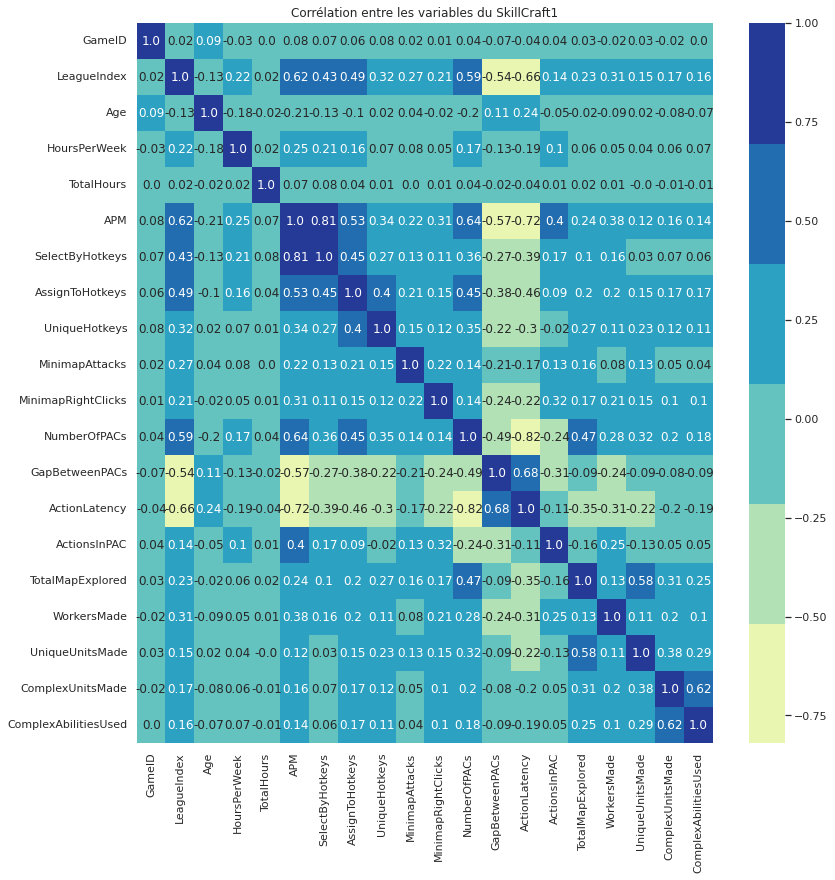

In [ ]:
colormap = sns.color_palette("YlGnBu")
df = round(SkillCraft.corr(),2)
ax = plt.axes()
set_size(10,10)
sns.heatmap(df, annot=True, cmap=colormap, fmt="")
ax.set_title("Corrélation entre les variables du SkillCraft1")

In [ ]:
#d
removed_cols = ['GameID','LeagueIndex','TotalHours','MinimapRightClicks','UniqueUnitsMade',
                   'ComplexUnitsMade','ComplexAbilitiesUsed', 'SelectByHotkeys','MinimapAttacks', 'ActionLatency','TotalMapExplored', 'NumberOfPACs', 'ActionLatency', 'Leagues']

col= ['Age','HoursPerWeek',	'APM',	'AssignToHotkeys',	'UniqueHotkeys',	'GapBetweenPACs',	'ActionsInPAC']
x = SC_sansNull[col]
y= SC_sansNull['LeagueIndex']

X_train, X_test, Y_train,Y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2670, 7)
(668, 7)
(2670,)
(668,)


In [ ]:
X_train

,Age,HoursPerWeek,APM,AssignToHotkeys,UniqueHotkeys,GapBetweenPACs,ActionsInPAC
3310,34,4,77.5512,0.000486,7,31.8431,4.9740
1773,18,12,101.6064,0.000161,5,40.8986,4.8989
481,21,28,126.4902,0.000405,2,29.6970,4.4925
837,19,36,184.6338,0.000931,8,30.7126,3.9557
486,20,10,45.5952,0.000094,0,62.1084,3.7353
...,...,...,...,...,...,...,...
1993,22,10,109.5276,0.000486,4,35.9018,4.7645
2580,26,8,79.0356,0.000247,8,35.7414,5.6212
92,20,18,193.6086,0.000652,7,17.9945,5.6421
2823,20,8,123.3264,0.000622,6,25.1462,5.2974


In [ ]:
model_sk = LinearRegression(fit_intercept=True).fit(X_train, Y_train)
model_sk.coef_

array([ 2.33236507e-03,  8.65951957e-03,  1.24987561e-02,  9.73573936e+02,
        3.80646745e-02, -2.30777956e-02, -1.21316973e-01])

In [ ]:
print(model_sk.intercept_, model_sk.coef_, model_sk.score(X_train, Y_train))

3.5551104476653403 [ 2.33236507e-03  8.65951957e-03  1.24987561e-02  9.73573936e+02
  3.80646745e-02 -2.30777956e-02 -1.21316973e-01] 0.4849963114393452


In [ ]:
SkillCraft.loc[152]

GameID                       506
LeagueIndex                    5
Age                           26
HoursPerWeek                  12
TotalHours                   200
APM                      111.342
SelectByHotkeys         0.004375
AssignToHotkeys         0.000301
UniqueHotkeys                  2
MinimapAttacks           0.00037
MinimapRightClicks       0.00044
NumberOfPACs            0.002361
GapBetweenPACs           18.8515
ActionLatency             65.098
ActionsInPAC              7.1765
TotalMapExplored              12
WorkersMade             0.000695
UniqueUnitsMade                4
ComplexUnitsMade             0.0
ComplexAbilitiesUsed         0.0
Leagues                  Diamond
Name: 152, dtype: object

In [ ]:
league = np.round(model_sk.predict([np.array(SkillCraft[col].loc[152])]))
print('Aves ces paramètres, tu es dans la ligue:', league[0])

Aves ces paramètres, tu es dans la ligue: 4.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


y_train_predict = np.round(model_sk.predict(X_train))
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
accuracy = accuracy_score(Y_train, y_train_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("L'accuracy est de {}".format(accuracy))
print('\n')
 
# model evaluation for testing set
y_test_predict = np.round(model_sk.predict(X_test))
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
accuracy = accuracy_score(Y_test, y_test_predict)
 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("L'accuracy est de {}".format(accuracy))

La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 1.0771720500775004
le score R2 est 0.45076684652047294
L'accuracy est de 0.37153558052434454


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 1.0652373157762338
le score R2 est 0.43766734966988174
L'accuracy est de 0.3502994011976048


# Modèles de classification




In [ ]:
X = SC_sansNull.drop(['Age','GameID','TotalHours','TotalMapExplored','ComplexAbilitiesUsed','ComplexUnitsMade','UniqueUnitsMade','MinimapRightClicks','Leagues', 'LeagueIndex'], axis = 1)
Y = SC_sansNull.LeagueIndex

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2670, 11)
(668, 11)
(2670,)
(668,)


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_S = scaler.transform(X_train)

scalert = preprocessing.StandardScaler().fit(X_test)
X_test_S = scalert.transform(X_test)

## GradientBoostingClassifier

In [ ]:
def test_gb_c(parameters, scoring_type):
    gb = GradientBoostingClassifier()
    
    grid = GridSearchCV(gb,parameters,scoring=scoring_type)

    grid.fit(X_train_S,Y_train)
    
    print('Gradiant boosting : ')
    print('Best  accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    print('Confusion matrix : \n',confusion_matrix(grid.best_estimator_.predict(X_test), Y_test))
    return grid

In [ ]:
scoring_type='accuracy'

##------------------------------------------GB------------------------------------------##

param_gb = {'n_estimators': [150], 'learning_rate' : [0.1], 'max_depth' : [i for i in range(4)], 'subsample' : [.75, 1], 'random_state': [1]}
gb = test_gb_c(param_gb, scoring_type)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/en

Gradiant boosting : 
Best  accuracy =  0.3970037453183521
Best parameters :  {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 150, 'random_state': 1, 'subsample': 0.75}
Confusion matrix : 
 [[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [ 33  47 106 151 137 124   6]
 [  2   3   8   9   5   0   0]
 [  2   8  10   9   4   4   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



## RandomForestClassifier

In [ ]:
def test_rf_c(parameters, scoring_type):
    rf = RandomForestClassifier()
    
    grid = GridSearchCV(rf,parameters,scoring=scoring_type)

    grid.fit(X_train_S,Y_train)
    
    print('Random Forest :')
    print('Best  accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    print('Confusion matrix : \n',confusion_matrix( grid.best_estimator_.predict(X_test), Y_test))
    return grid


In [ ]:
scoring_type='accuracy'

##------------------------------------------RF------------------------------------------##

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 3)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(60, 70, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
param_rf = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
rf = test_rf_c(param_rf, scoring_type)

## Smote + GradientBoostingClassifier / RandomForestClassifier

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(k_neighbors = 3 ,random_state=42)
print('X shape : ', X.shape,'  Y shape', Y.shape)
print(Y.value_counts())
X_res, Y_res = sm.fit_resample(X, Y)
print('Resampling...')
print('new X shape : ', X_res.shape,'new Y shape', Y_res.shape)
print(Y_res.value_counts())

X shape :  (3338, 11)   Y shape (3338,)
4    811
5    804
6    621
3    553
2    347
1    167
7     35
Name: LeagueIndex, dtype: int64
Resampling...
new X shape :  (5677, 11) new Y shape (5677,)
5    811
4    811
3    811
2    811
1    811
7    811
6    811
Name: LeagueIndex, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_res, Y_res, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4541, 11)
(1136, 11)
(4541,)
(1136,)


In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_S = scaler.transform(x_train)

scalert = preprocessing.StandardScaler().fit(x_test)
x_test_S = scalert.transform(x_test)

In [ ]:
def test_gb_c(parameters, scoring_type):
    gb = GradientBoostingClassifier()
    
    grid = GridSearchCV(gb,parameters,scoring=scoring_type)

    grid.fit(x_train_S,y_train)
    
    print('Gradiant boosting : ')
    print('Best  accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    print('Confusion matrix : \n',confusion_matrix(grid.best_estimator_.predict(x_test), y_test))
    return grid

def test_rf_c(parameters, scoring_type):
    rf = RandomForestClassifier()
    
    grid = GridSearchCV(rf,parameters,scoring=scoring_type)

    grid.fit(x_train_S,y_train)
    
    print('Random Forest :')
    print('Best  accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    print('Confusion matrix : \n',confusion_matrix( grid.best_estimator_.predict(x_test), y_test))
    return grid

In [ ]:
scoring_type='accuracy'

##------------------------------------------GB------------------------------------------##

param_gb = {'n_estimators': [80], 'learning_rate' : [0.1], 'max_depth' : [i for i in range(4)], 'subsample' : [.75, 1], 'random_state': [1]}
gb = test_gb_c(param_gb, scoring_type)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/en

Gradiant boosting : 
Best  accuracy =  0.5423908249855823
Best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80, 'random_state': 1, 'subsample': 1}
Confusion matrix : 
 [[  0   0   0   0   0   0   0]
 [176 145 148 181 180 149 157]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



In [ ]:
scoring_type='accuracy'

##------------------------------------------RF------------------------------------------##

# Number of trees in random forest
n_estimators = [350]
# Maximum number of levels in tree
max_depth = [50]


# Create the random grid
param_rf = {'n_estimators': n_estimators,
               'max_depth': max_depth}
rf = test_rf_c(param_rf, scoring_type)

Random Forest :
Best  accuracy =  0.6366445675404544
Best parameters :  {'max_depth': 50, 'n_estimators': 350}
Confusion matrix : 
 [[  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [176 145 148 181 180 149 157]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



## Essai annexe de prédiction par classification

Nous essayons de prédire si le joeur se trouve dans une league qui lui correspond.

In [ ]:
df_essai = SkillCraft
df_essai.dropna(inplace = True)
df_essai.shape

(3338, 28)

In [ ]:
def f(x, num_league):
    if (x > num_league):
        return 1
    else:
        return 0

In [ ]:
df_essai['L1'] = df_essai.LeagueIndex.apply(lambda x : f(x, 1))
df_essai['L2'] = df_essai.LeagueIndex.apply(lambda x : f(x, 2))
df_essai['L3'] = df_essai.LeagueIndex.apply(lambda x : f(x, 3))
df_essai['L4'] = df_essai.LeagueIndex.apply(lambda x : f(x, 4))
df_essai['L5'] = df_essai.LeagueIndex.apply(lambda x : f(x, 5))
df_essai['L6'] = df_essai.LeagueIndex.apply(lambda x : f(x, 6))
df_essai['L7'] = df_essai.LeagueIndex.apply(lambda x : f(x, 7))

In [ ]:
df_essai[['LeagueIndex', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']].head(10)

,LeagueIndex,L1,L2,L3,L4,L5,L6,L7
0,5,1,1,1,1,0,0,0
1,5,1,1,1,1,0,0,0
2,4,1,1,1,0,0,0,0
3,3,1,1,0,0,0,0,0
4,3,1,1,0,0,0,0,0
5,2,1,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,7,1,1,1,1,1,1,0
8,4,1,1,1,0,0,0,0
9,4,1,1,1,0,0,0,0


In [ ]:
X = df_essai.drop(['LeagueIndex', 'GameID', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'Leagues'], axis = 1)
Y1 = df_essai.L1
Y2 = df_essai.L2
Y3 = df_essai.L3
Y4 = df_essai.L4
Y5 = df_essai.L5
Y6 = df_essai.L6
Y7 = df_essai.L7
Y = df_essai.LeagueIndex

In [ ]:
def test_gb_c(parameters, scoring_type,X_train, X_test, Y_train, Y_test):
    gb = GradientBoostingClassifier()
    
    grid = GridSearchCV(gb,parameters,scoring=scoring_type)

    grid.fit(X_train,Y_train)
    
    print('Gradiant boosting : ')
    print('Best  accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    print('values du test : ', Y_test.value_counts())
    print('Confusion matrix : \n',confusion_matrix( grid.best_estimator_.predict(X_test), Y_test))
    return grid

In [ ]:
L_Y = [Y1, Y2, Y3, Y4 , Y5, Y6, Y7]
Modeles = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 37)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
scalert = preprocessing.StandardScaler().fit(X_test)
X_test = scalert.transform(X_test)

In [ ]:
for i in range(6):
    X_train, X_test, Y_train, Y_test = train_test_split(X, L_Y[i], test_size = 0.2)
    scoring_type='accuracy'
    print("Prédiction pour la League ", i+1)
    param_gb = {'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [100], 'random_state': [1]}
    gb = test_gb_c(param_gb, scoring_type,X_train, X_test, Y_train, Y_test)
    Modeles.append(gb)

Prédiction pour la League  1
Gradiant boosting : 
Best  accuracy =  0.9434456928838951
Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 1}
values du test :  1    640
0     28
Name: L1, dtype: int64
Confusion matrix : 
 [[  6  10]
 [ 22 630]]
Prédiction pour la League  2
Gradiant boosting : 
Best  accuracy =  0.8775280898876405
Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 1}
values du test :  1    571
0     97
Name: L2, dtype: int64
Confusion matrix : 
 [[ 51  23]
 [ 46 548]]
Prédiction pour la League  3
Gradiant boosting : 
Best  accuracy =  0.8183520599250936
Best parameters :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 1}
values du test :  1    436
0    232
Name: L3, dtype: int64
Confusion matrix : 
 [[137  58]
 [ 95 378]]
Prédiction pour la League  4
Gradiant boosting : 
Best  accuracy =  0.8082397003745317
Best parameters :  {'learning_rate': 0.1, 'max_de

On n'utilise pas ce modèle pour la league 7 car il y a beaucoup de 1. On est limité.

#Conclusion

Le meilleur modèle est le random Forest avec un score accuracy=**0.63**.  


C'est celui qu'on utilse dans notre API pour déterminer la league des joueurs.

Nous voulions savoir comment déterminer la leagued'un joueur à partir de ces statistiques. 

Les caractéristiques pour déterminer la leagued'un joueur sont **'HoursPerWeek', 'Actions par minute', 'SelectByHotkeys', 'AssignToHotkeys','UniqueHotkeys', 'MinimapAttacks', 'NumberOfPACs', 'GapBetweenPACs','ActionLatency', 'ActionsInPAC', 'WorkersMade'** 


**Problème rencontrés:**

*   Il nous manque des informations sur la League 8, donc nous avons pris la décision de supprimer les lignes des joeurs de League 8 pour la partie prédiction. La prédiction de leur league est simple étant donné qu'il y avait deux valeurs NaN sur les colonnes 'Age'	et 'HoursPerWeek' et que ce sont les seules lignes ayant ces particularités.
*   Nous nous sommes retrouvés avec des résultats en dessous de nos attentes. Nous avions commencé par de la classification sur toutes les colonnes de notre dataset et nous arrivions à des résultats d'accuracy de 0,3. 
Nous avons donc essayé de faire de la régression qui ne nous a pas donné de meilleurs résultats. 
*Nous nous sommes alors concentrés sur de la classification en selectionnant les colonnes ('HoursPerWeek', 'Actions par minute', 'SelectByHotkeys', 'AssignToHotkeys','UniqueHotkeys', 'MinimapAttacks', 'NumberOfPACs', 'GapBetweenPACs','ActionLatency', 'ActionsInPAC', 'WorkersMade').
* Nous avons également essayé de prédire si le joeur était dans une league qui lui correspondait. Notre modèle est limité car à partir de la League 7 il ne fonctionne plus comme précisé dans notre code. C'est pour cela que nous avons abandonné ce modèle.

**Meilleur résultat obtenu**
Nous avons obtenu notre meilleur résultat en faisant de la classification sur les colonnes citées précédement à l'aide d'un GradientBostingClassifier. 




